In [1]:
from torch.utils.data import DataLoader, Subset, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

In [2]:
torch.manual_seed(265)
torch.set_default_dtype(torch.double)

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
bird_plane_indices_train = [i for i in range(len(train_dataset)) if train_dataset.targets[i] in [0, 2]]
bird_plane_indices_test = [i for i in range(len(test_dataset)) if test_dataset.targets[i] in [0, 2]]

train_dataset = Subset(train_dataset, bird_plane_indices_train)
test_dataset = Subset(test_dataset, bird_plane_indices_test)

In [5]:
num_train_total = len(train_dataset)
num_train = int(0.8 * num_train_total)
num_val = num_train_total - num_train

train_dataset, val_dataset = random_split(train_dataset, [num_train, num_val])

In [6]:
len(train_dataset), len(val_dataset), len(test_dataset)

(8000, 2000, 2000)

In [7]:
airplane_count_train = sum(label == 0 for _, label in train_dataset)
bird_count_train = sum(label == 2 for _, label in train_dataset)

airplane_count_val = sum(label == 0 for _, label in val_dataset)
bird_count_val = sum(label == 2 for _, label in val_dataset)

airplane_count_test = sum(label == 0 for _, label in test_dataset)
bird_count_test = sum(label == 2 for _, label in test_dataset)

print(f"Train: {airplane_count_train} Airplanes, {bird_count_train} Birds")
print(f"Validation: {airplane_count_val} Airplanes, {bird_count_val} Birds")
print(f"Test: {airplane_count_test} Airplanes, {bird_count_test} Birds")

Train: 3976 Airplanes, 4024 Birds
Validation: 1024 Airplanes, 976 Birds
Test: 1000 Airplanes, 1000 Birds


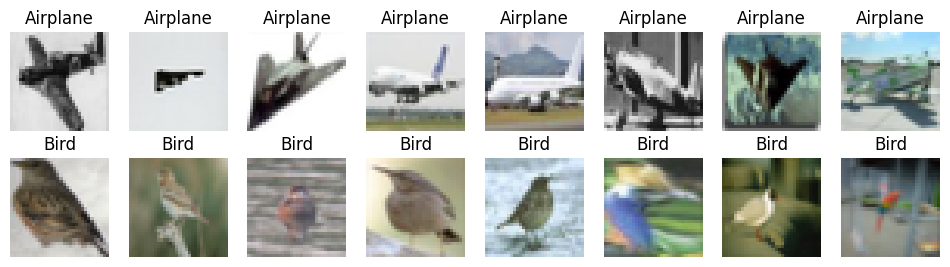

In [8]:
def show_imgs(imgs, titles, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 3))

    for i, (img, title) in enumerate(zip(imgs, titles)):
        img = img / 2 + 0.5
        npimg = img.numpy()
        row = i // cols
        col = i % cols
        axes[row, col].imshow(np.transpose(npimg, (1, 2, 0)))
        axes[row, col].set_title(title)
        axes[row, col].axis('off')

    plt.show()


airplane_indices = [i for i, (img, label) in enumerate(train_dataset) if label == 0][:8]
bird_indices = [i for i, (img, label) in enumerate(train_dataset) if label == 2][:8]

airplane_images = [train_dataset[i][0] for i in airplane_indices]
bird_images = [train_dataset[i][0] for i in bird_indices]

show_imgs(airplane_images + bird_images, ['Airplane'] * 8 + ['Bird'] * 8, rows=2, cols=8)

In [9]:
batch_size = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)